In [2]:
import pandas as pd

In [50]:
file_details = pd.read_csv("movie_title_details_wiki_filtered.txt",sep="\t")

In [51]:
file_details.head()

,title,year,type,details_json,page_view_data
0,Yosemite,2016,Test,"{""Title"":""Yosemite"",""Year"":""2015"",""Rated"":""R"",...","2016-01-01:47,2016-01-02:53,2016-01-03:60,2016..."
1,The Wait,2014,Test,"{""Title"":""The Wait"",""Year"":""2014"",""Rated"":""N/A...","2014-03-01:47,2014-03-02:34,2014-03-03:13,2014..."
2,In Bloom,2014,Test,"{""Title"":""Rose in bloom"",""Year"":""2014"",""Rated""...","2014-09-01:160,2014-09-02:171,2014-09-03:205,2..."
3,The Legend of Hercules,2014,Test,"{""Title"":""The Legend of Hercules"",""Year"":""2014...","2014-01-01:5,2014-01-02:6,2014-01-03:1,2014-01..."
4,The Pirates Who Don't Do Anything,2008,Train,"{""Title"":""The Pirates Who Don't Do Anything: A...","2008-01-01:139,2008-01-02:610,2008-01-03:471,2..."


In [52]:
file_details.count()

title             3830
year              3830
type              3830
details_json      3830
page_view_data    3103
dtype: int64

In [53]:
file_details.dropna().count()

title             3103
year              3103
type              3103
details_json      3103
page_view_data    3103
dtype: int64

In [54]:
file_details_complete = file_details.dropna()

In [56]:
file_revenue = pd.read_csv("revenue.csv")

In [57]:
file_revenue.head(10)

,title,date,link,weekendRevenue,weekendScreens,firstRevenue,firstScreens,multipleTables
0,Chimes at Midnight (2016 re-release),1/1/2016,/movies/?id=chimesatmidnight2015.htm,"$20,600(Estimate)",2,"$6,100",2,False
1,Ho Mann Jahaan,1/1/2016,/movies/?id=homannjahaan.htm,"$77,800",19,-3,-4,False
2,Yosemite,1/1/2016,/movies/?id=yosemite.htm,"$4,500",2,-3,-4,False
3,Only Yesterday (2016 re-release),1/1/2016,/movies/?id=onlyyesterday2016.htm,"$15,000",1,"$6,800",1,False
4,Return to Nuke 'Em High Volume 1,1/10/2014,/movies/?id=nukeem1.htm,"$3,500",1,"$1,100",1,False
5,The Jewish Cardinal,1/10/2014,/movies/?id=jewishcardinal.htm,"$3,900",1,-3,-4,False
6,The Wait,1/10/2014,/movies/?id=wait.htm,$200,1,-3,-4,False
7,If You Build It,1/10/2014,/movies/?id=ifyoubuildit.htm,"$5,400",1,-3,-4,False
8,The Truth About Emanuel,1/10/2014,/movies/?id=truthaboutemanuel.htm,-1,-2,-3,-4,False
9,The Rocket (2014),1/10/2014,/movies/?id=rocket2014.htm,"$5,000",2,-3,-4,False


In [79]:
file_revenue_filtered = file_revenue[file_revenue['weekendRevenue'] != '-1']
file_revenue_filtered  = file_revenue_filtered [file_revenue_filtered ['weekendRevenue'] != 'n/a']

In [80]:
file_revenue_filtered.count()

title             6160
date              6160
link              6160
weekendRevenue    6160
weekendScreens    6160
firstRevenue      6160
firstScreens      6160
multipleTables    6160
dtype: int64

In [81]:
merged_table = pd.merge(file_revenue_filtered,file_details_complete,how='inner',on='title')

In [82]:
merged_table.count()

title             2893
date              2893
link              2893
weekendRevenue    2893
weekendScreens    2893
firstRevenue      2893
firstScreens      2893
multipleTables    2893
year              2893
type              2893
details_json      2893
page_view_data    2893
dtype: int64

In [85]:
merged_table.head(1)

,title,date,link,weekendRevenue,weekendScreens,firstRevenue,firstScreens,multipleTables,year,type,details_json,page_view_data
0,Yosemite,1/1/2016,/movies/?id=yosemite.htm,"$4,500",2,-3,-4,False,2016,Test,"{""Title"":""Yosemite"",""Year"":""2015"",""Rated"":""R"",...","2016-01-01:47,2016-01-02:53,2016-01-03:60,2016..."


In [3]:
file_revenue = pd.read_csv("processed_training_data.txt",sep="\t")
file_revenue.head(2)

,Type,Title,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,...,Genre_News,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Weekend_Revenue
0,Test,The Legend of Hercules,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9592500
1,Train,The Pirates Who Don't Do Anything,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5098000


In [42]:
train_data=file_revenue[file_revenue['Type'] == "Train"]
revenue_column= train_data['Weekend_Revenue']
revenue_column.head(2)

1     5098000
2    21243000
Name: Weekend_Revenue, dtype: int64

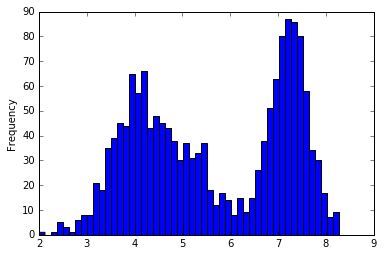

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.figure()
col2 = np.log10(revenue_column)
col2.plot.hist(bins=50)

In [109]:
import sklearn
from sklearn.cluster import KMeans
num_cluster=40
print sklearn.__version__
print revenue_column.shape
kmeans = KMeans(n_clusters=num_cluster).fit(revenue_column[:,np.newaxis])
print labels.shape
labels_flag=labels==1
print labels[labels_flag].shape
print labels_flag
cluster_centers=kmeans.cluster_centers_
print "Cluster centre:" ,cluster_centers.shape
print set(labels)
cluster_centers[labels][labels ==1]
print cluster_centers[labels[2]]

0.17.1
(1582,)
(1582,)
(22,)
[False False False ..., False False False]
Cluster centre: (40, 1)
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
[  1.63476767e+08]


In [103]:
def calculate_k_means_variance(df,num_clusters):
    kmeans = KMeans(n_clusters=num_clusters).fit(df)
    labels=kmeans.labels_
    cluster_centers=kmeans.cluster_centers_
    return get_sum_squared_error(df,labels,cluster_centers)

def get_sum_squared_error(df,labels,cluster_centers):
    cluster_var=0.0
    for label in set(labels):
        cluster_var += np.sum(np.square(df[labels==label]- cluster_centers[labels][labels==label]))
    return cluster_var    

def plot_rmse(df):
    x_array=range(2,51)
    y_array=[]
    total_var=np.var(df)
    for num_clusters in range(2,51):
        y_array.append(calculate_k_means_variance(df,num_clusters))
    print y_array    
    plt.plot(x_array,y_array,'ob-', linewidth=3)

[604.69803149850384, 287.55465067630917, 200.14355549202872, 129.94764894909656, 96.066128165206322, 74.16972020031892, 58.321522717468646, 45.281004038912251, 38.02811679642047, 31.213399051570104, 26.055501961814265, 22.632663788927225, 19.585625005946234, 16.880346990833335, 14.444085694040494, 13.121909797828806, 11.753183942858064, 10.622989151138432, 9.6611930456587949, 8.7589247821992124, 7.9537335286430206, 7.347911811130202, 6.6127288773780784, 6.1025782690201256, 5.6232713494030673, 5.2107404501831702, 4.9482702186290561, 4.5936303605290671, 4.3539030533170235, 4.1171086022061623, 3.8606004919702825, 3.5841613292810264, 3.4298847132862784, 3.2104570122299183, 2.9745716007150689, 2.827982108750585, 2.6096093514244512, 2.5656139052587621, 2.4244142786398033, 2.2697543864456731, 2.10978338623217, 2.1051433595489168, 1.9308383918628513, 1.8867265512464249, 1.8131654904751275, 1.7071822528276297, 1.6473014352591062, 1.5711504399028797, 1.4993532858342355]


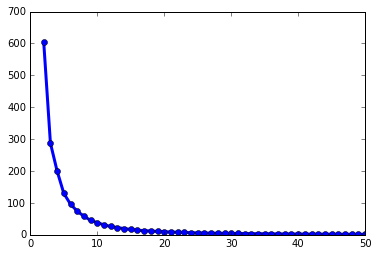

In [112]:
log_revenue = np.log10(revenue_column[:,np.newaxis])
plot_rmse(log_revenue)

In [147]:
number_of_cluster_chosen=10

(array([ 191.,  230.,  165.,   78.,  230.,  241.,  164.,  138.,   54.,   91.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

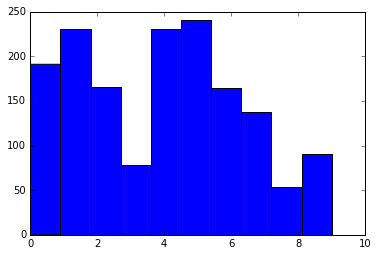

In [148]:
kmeans = KMeans(n_clusters=number_of_cluster_chosen).fit(log_revenue)
labels=kmeans.labels_
plt.hist(labels)

In [134]:
def print_range(label,labels,df):
    min_value=np.min(df[labels==label])
    max_value = np.max(df[labels==label])
    print "Range for label %d is %f - %f" %(label,min_value,max_value)
for label in set(labels):
    print_range(label,labels,revenue_column[:,np.newaxis])

Range for label 0 is 5100.000000 - 14400.000000
Range for label 1 is 8699100.000000 - 20193500.000000
Range for label 2 is 125600.000000 - 473800.000000
Range for label 3 is 14500.000000 - 40300.000000
Range for label 4 is 20418500.000000 - 49119000.000000
Range for label 5 is 491300.000000 - 2313500.000000
Range for label 6 is 1400.000000 - 5000.000000
Range for label 7 is 40700.000000 - 124900.000000
Range for label 8 is 100.000000 - 1300.000000
Range for label 9 is 49463800.000000 - 189961400.000000
Range for label 10 is 2426100.000000 - 8611600.000000
